Decision Tree

Data Exploration:

In [57]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv(r"C:\Users\PRJAWAL\OneDrive\Desktop\Excelr\Assignment-13\Decision Tree\heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [3]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [6]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [39]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [40]:
data.dropna(inplace=True)

In [41]:
data.drop_duplicates(inplace=True)

In [42]:
data.corr(numeric_only=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.036024,-0.091885,0.243915,-0.107575,0.177026,-0.037690,-0.345681,0.192967,0.243280,-0.051361,0.074146,0.331071
sex,0.036024,1.000000,-0.140694,-0.002662,-0.201182,0.075313,0.055863,-0.175835,0.181764,0.102973,-0.047406,0.047756,0.259206
cp,-0.091885,-0.140694,1.000000,-0.019207,0.070529,-0.033356,-0.105577,0.292492,-0.375858,-0.177378,0.096976,-0.016288,-0.332296
trestbps,0.243915,-0.002662,-0.019207,1.000000,0.100805,0.098835,0.025255,-0.108671,0.152406,0.168160,0.008632,0.029576,0.125304
chol,-0.107575,-0.201182,0.070529,0.100805,1.000000,-0.123664,-0.208166,0.224663,-0.039502,0.030052,0.049388,-0.094876,-0.256476
fbs,0.177026,0.075313,-0.033356,0.098835,-0.123664,1.000000,0.027196,-0.061784,0.011944,0.023915,-0.042744,-0.005419,0.138187
restecg,-0.037690,0.055863,-0.105577,0.025255,-0.208166,0.027196,1.000000,-0.181563,0.061681,-0.031954,-0.101629,-0.121181,0.003822
thalch,-0.345681,-0.175835,0.292492,-0.108671,0.224663,-0.061784,-0.181563,1.000000,-0.349293,-0.140423,0.249861,-0.016041,-0.349815
exang,0.192967,0.181764,-0.375858,0.152406,-0.039502,0.011944,0.061681,-0.349293,1.000000,0.387260,-0.161647,0.035398,0.384592
oldpeak,0.243280,0.102973,-0.177378,0.168160,0.030052,0.023915,-0.031954,-0.140423,0.387260,1.000000,-0.194242,0.055813,0.438834


<Axes: >

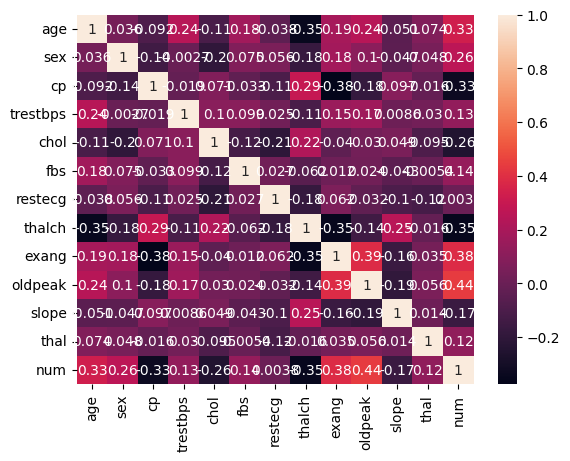

In [43]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

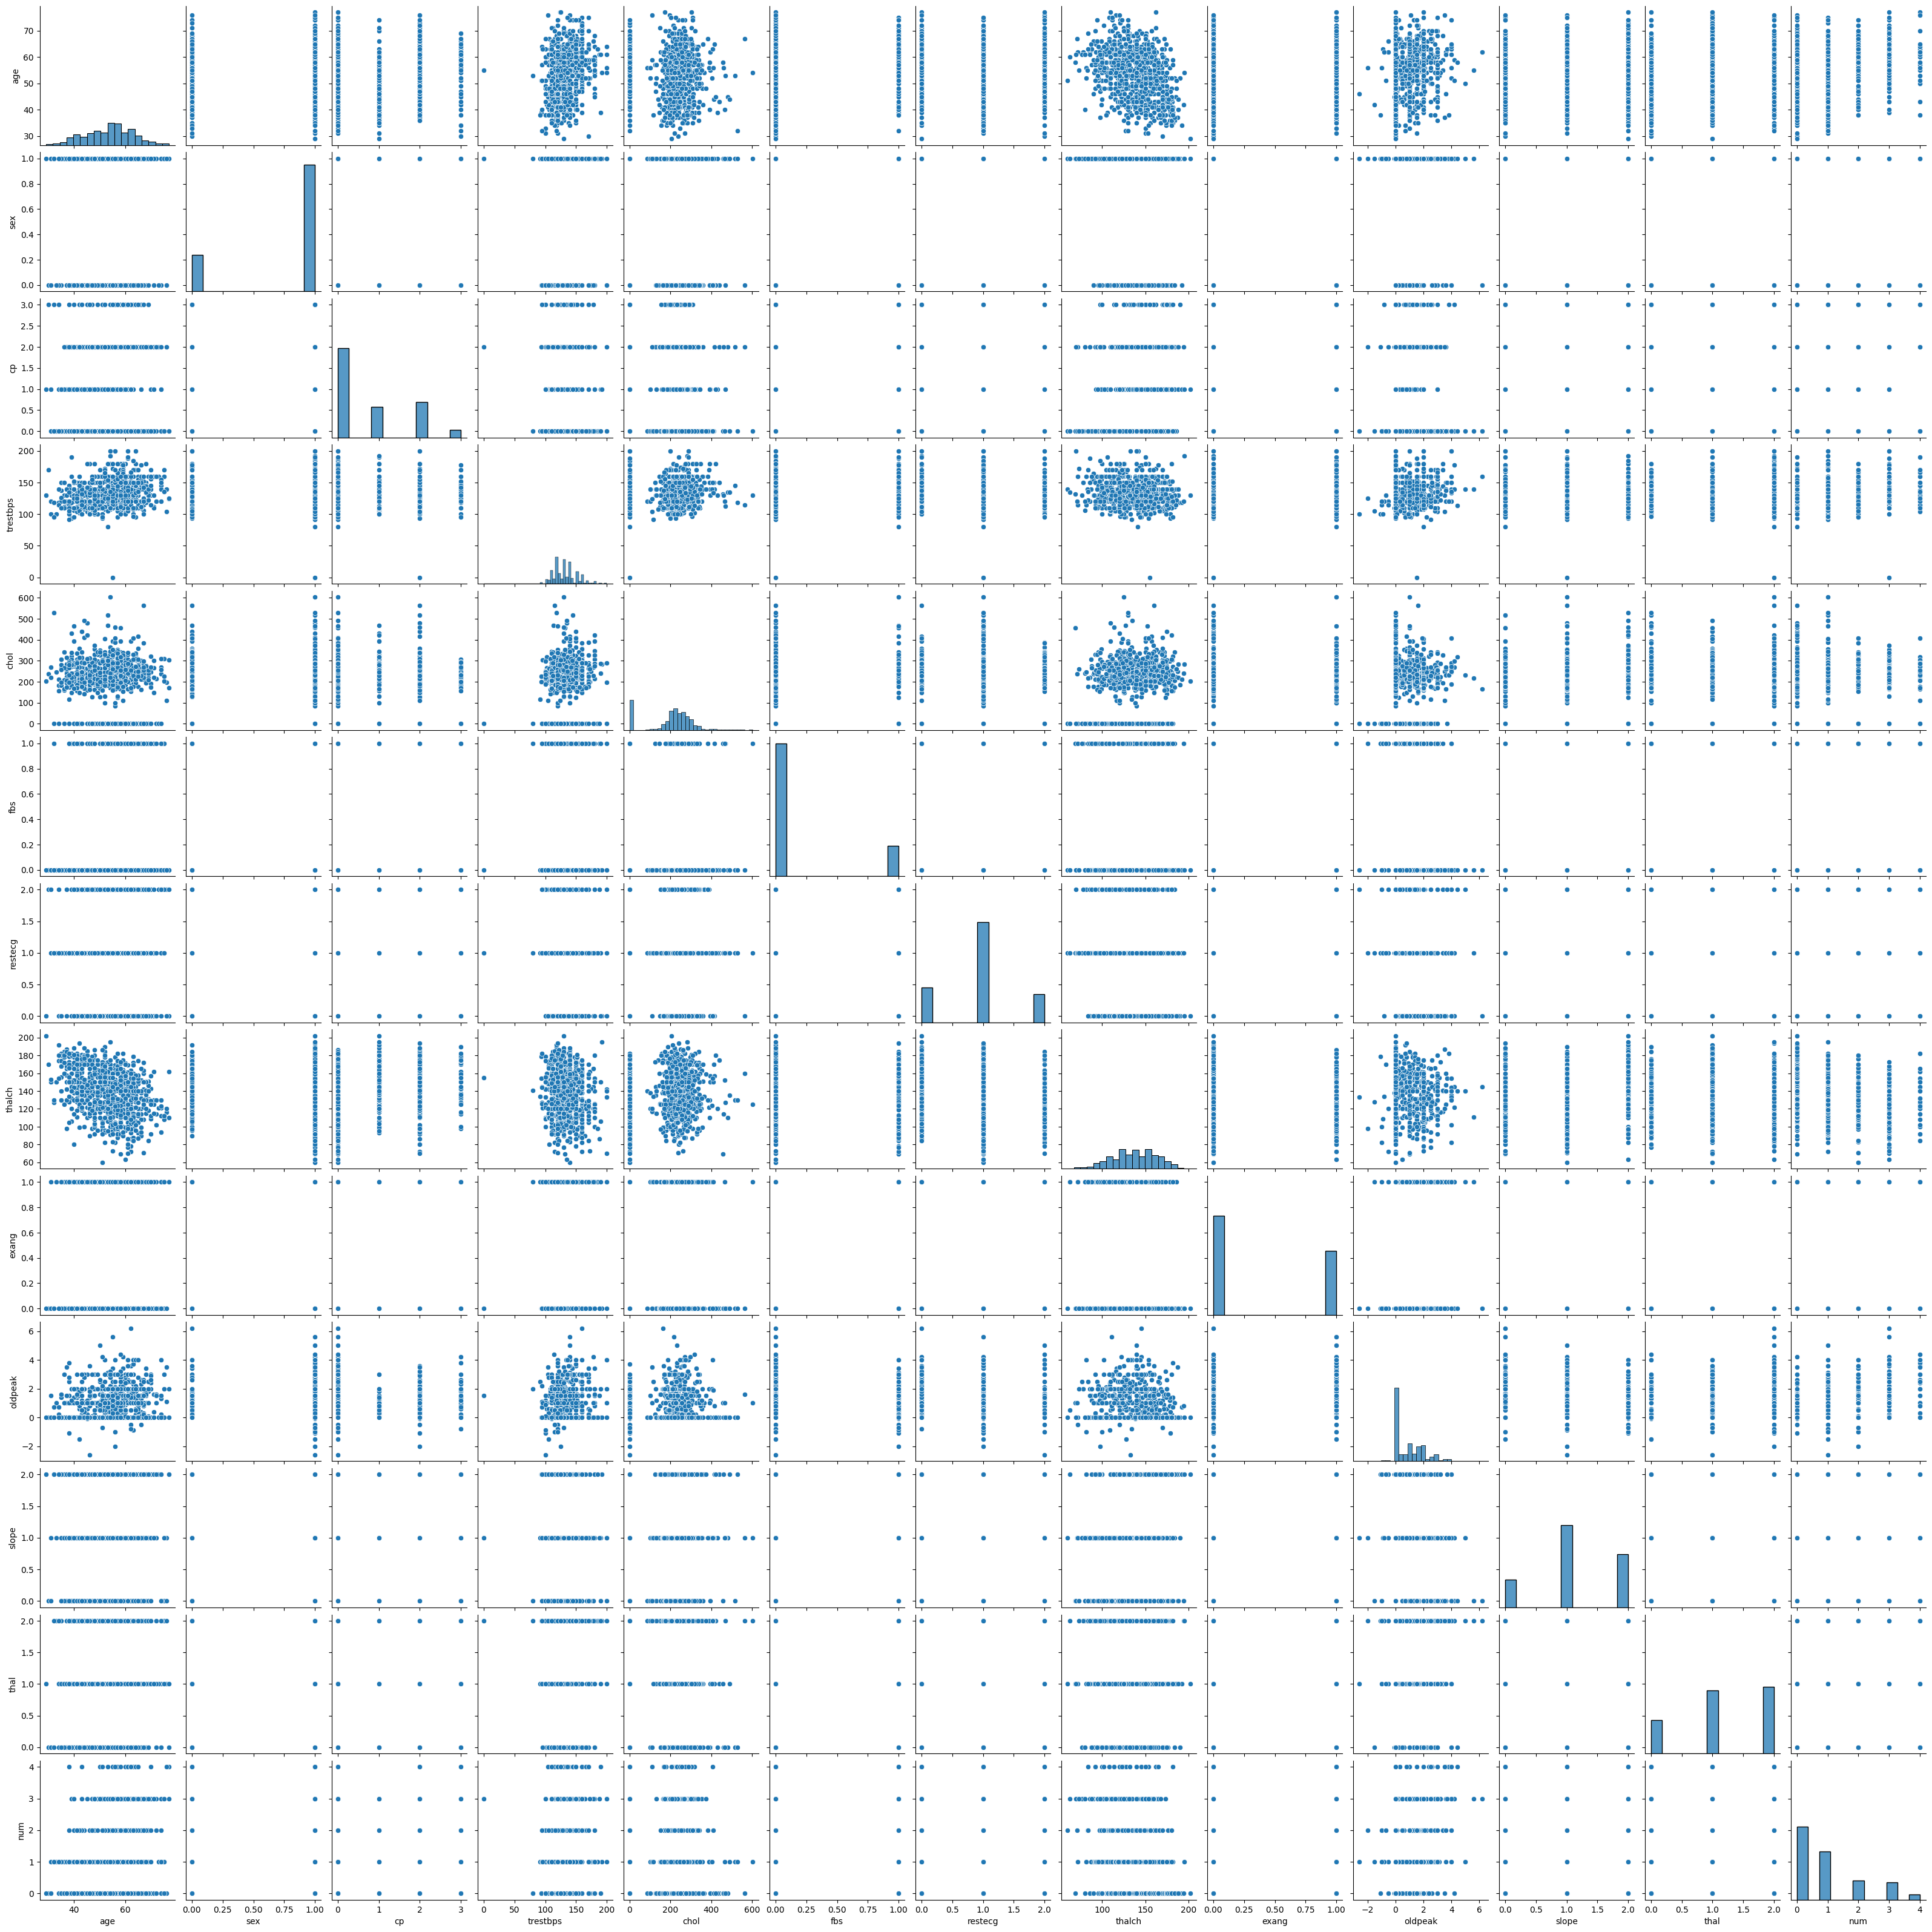

In [44]:
sns.pairplot(data)

<Axes: >

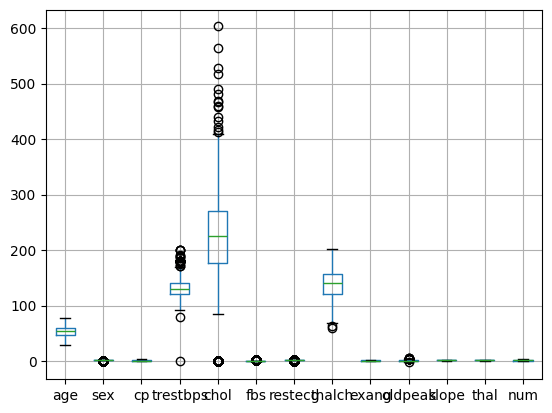

In [45]:
data.boxplot()

In [46]:
label=LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column]=label.fit_transform(data[column])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,0,0.0,1,2,4
902,62,1,0,160,254,1,2,108,1,3.0,1,1,4
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,0,4


Decision Tree Classification:

In [47]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

Standardization

In [49]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [50]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
# Handle categorical variables: convert them into numerical values
# You may use LabelEncoder or OneHotEncoder depending on your preference and the data
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,True,1,92,0,0.0,1,2,4
902,62,1,0,160,254,True,2,108,1,3.0,1,1,4
903,53,1,0,125,0,False,1,120,0,1.5,2,2,4
904,62,1,0,166,170,False,2,120,1,3.0,1,0,4


In [15]:
# Split the data into training and testing sets
#training=80%
#test=20%
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x,y

(     age
 0     63
 1     41
 2     57
 3     52
 4     57
 ..   ...
 903   53
 904   62
 905   56
 906   56
 907   57
 
 [908 rows x 1 columns],
 0      63
 1      41
 2      57
 3      52
 4      57
        ..
 903    53
 904    62
 905    56
 906    56
 907    57
 Name: age, Length: 908, dtype: int64)

In [16]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5812178997779012, 0.9705882352941176, 'x[2] <= -0.277\ngini = 0.683\nsamples = 676\nvalue = [300, 208, 82, 66, 20]'),
 Text(0.34161576901721263, 0.9117647058823529, 'x[8] <= 0.221\ngini = 0.727\nsamples = 370\nvalue = [75, 153, 70, 56, 16]'),
 Text(0.13221821210438645, 0.8529411764705882, 'x[4] <= -1.447\ngini = 0.725\nsamples = 153\nvalue = [52, 53, 26, 14, 8]'),
 Text(0.056635202665186006, 0.7941176470588235, 'x[9] <= 0.504\ngini = 0.697\nsamples = 45\nvalue = [4, 19, 14, 6, 2]'),
 Text(0.026651860077734593, 0.7352941176470589, 'x[3] <= -0.929\ngini = 0.593\nsamples = 30\nvalue = [3, 16, 10, 0, 1]'),
 Text(0.01776790671848973, 0.6764705882352942, 'x[0] <= -1.066\ngini = 0.34\nsamples = 10\nvalue = [1, 8, 1, 0, 0]'),
 Text(0.013325930038867296, 0.6176470588235294, 'x[9] <= -0.721\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1, 0, 0]'),
 Text(0.008883953359244865, 0.5588235294117647, 'x[11] <= 0.392\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0]'),
 Text(0.004441976679622432, 

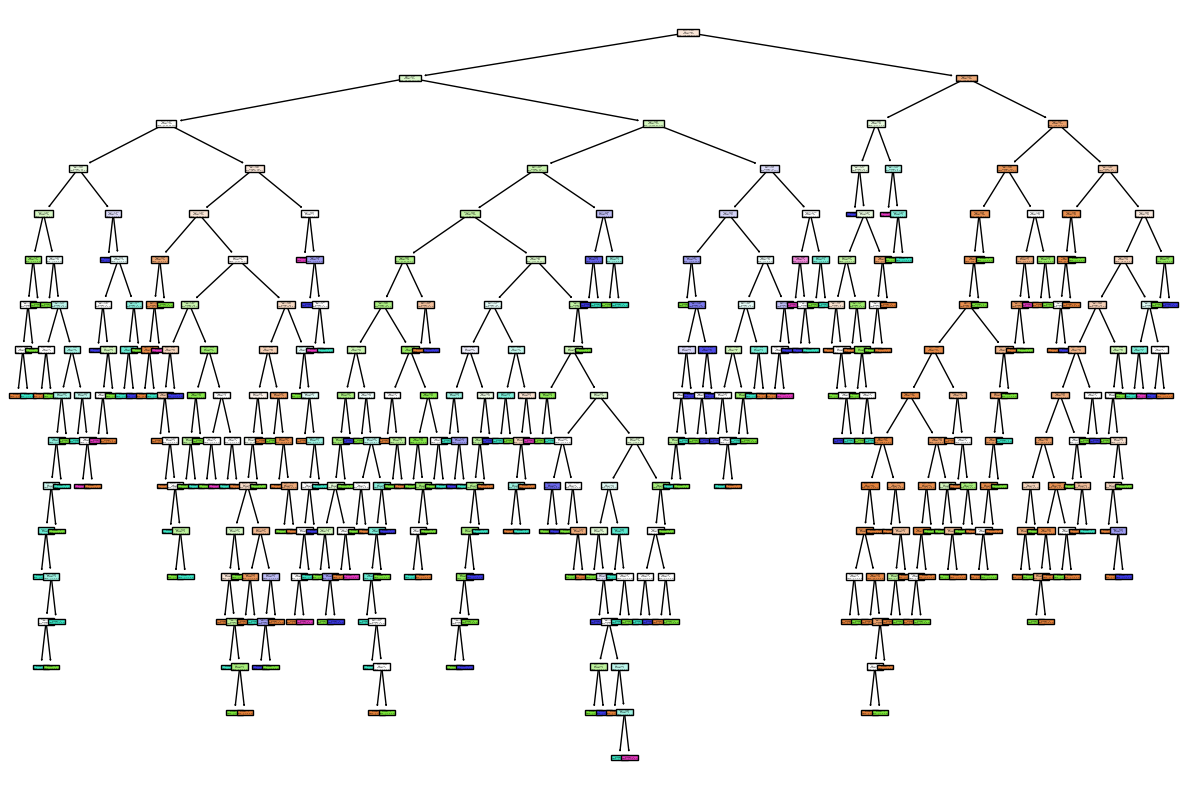

In [51]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [52]:
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.277\ngini = 0.683\nsamples = 676\nvalue = [300, 208, 82, 66, 20]'),
 Text(0.25, 0.5, 'x[8] <= 0.221\ngini = 0.727\nsamples = 370\nvalue = [75, 153, 70, 56, 16]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.725\nsamples = 153\nvalue = [52, 53, 26, 14, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.696\nsamples = 217\nvalue = [23, 100, 44, 42, 8]'),
 Text(0.75, 0.5, 'x[4] <= -0.772\ngini = 0.424\nsamples = 306\nvalue = [225, 55, 12, 10, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.742\nsamples = 30\nvalue = [7, 11, 7, 3, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.35\nsamples = 276\nvalue = [218, 44, 5, 7, 2]')]

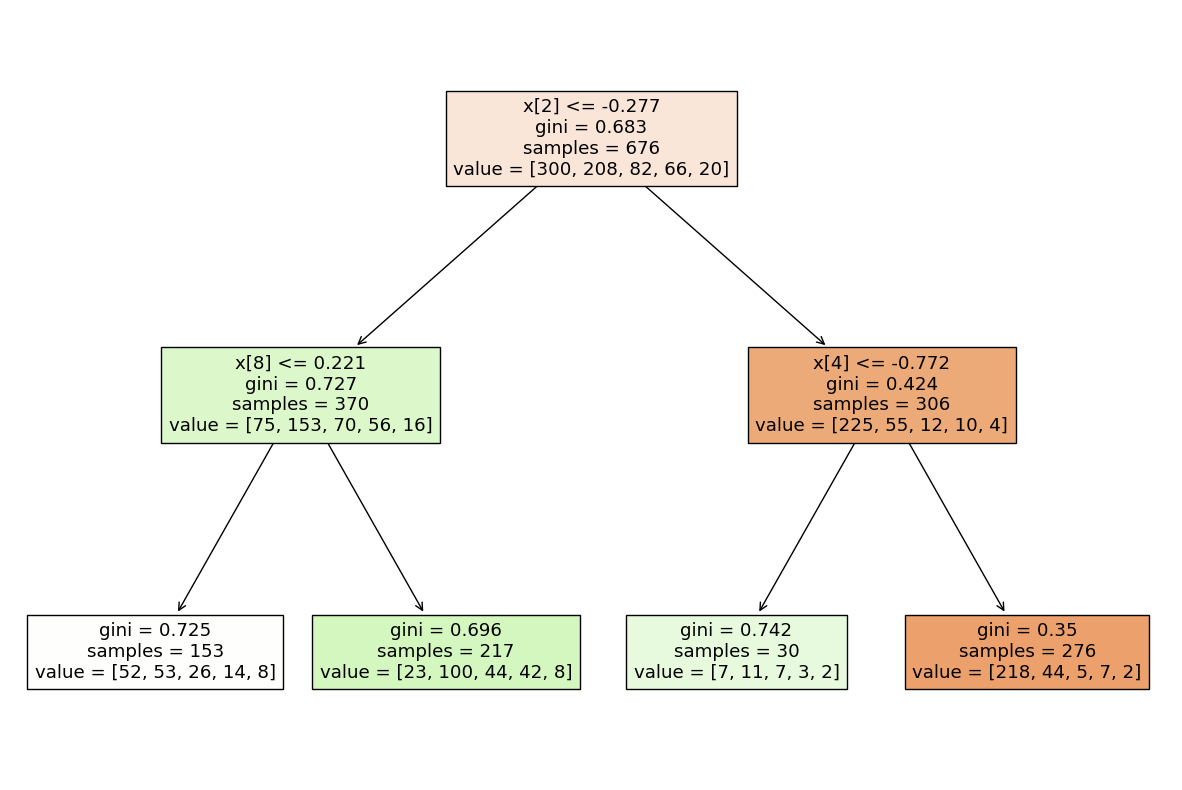

In [53]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [54]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        62
           1       0.88      0.35      0.50       107
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.53       169
   macro avg       0.31      0.24      0.25       169
weighted avg       0.80      0.53      0.59       169



In [58]:
confusion_matrix(y_pred,y_test)

array([[52,  5,  2,  3,  0],
       [26, 37, 16, 22,  6],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

Hyperparameter Tuning:

In [60]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=5)


Model Evaluation and Analysis:

Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans:Decision trees are powerful and flexible models, and tuning their hyperparameters can significantly impact their performance and behavior.
some of the commom hyperparameters for decision tree model are max_depth,min_samples_split,min_samples_leaf,etc..


2.What is the difference between the Label encoding and One-hot encoding?
Ans;
Label encoding and one-hot encoding are both techniques used to convert categorical data into a numerical format that machine learning algorithms can understand. However, they work differently and are suitable for different types of categorical variables

->Label encoding assigns a unique integer to each category in a categorical variable.->
It works well for ordinal categorical variables, where there is a natural order or ranking among the categories

->One-hot encoding creates binary columns for each category in a categorical variable.->
It works well for nominal categorical variables, where there is no inherent order among the categories...